In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Downloading daily prices of the two banks for a 2-year window
BARC = yf.download('BARC.L', start ='2023-01-01', end = '2025-01-01')
HSBA = yf.download('HSBA.L', start ='2023-01-01', end = '2025-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
BARC

Price,Close,High,Low,Open,Volume
Ticker,BARC.L,BARC.L,BARC.L,BARC.L,BARC.L
Date,,,,,
2023-01-03,149.113983,149.761108,144.994204,145.395247,34940227
2023-01-04,153.197311,153.388709,149.569726,149.569726,31851649
2023-01-05,157.153015,158.356142,151.629602,152.376988,40113321
2023-01-06,156.861343,157.408208,156.168629,156.606137,23266356
2023-01-09,157.335281,158.738929,156.660814,156.861335,32930427
...,...,...,...,...,...
2024-12-23,261.600006,262.049988,259.299988,261.200012,13605305
2024-12-24,263.549988,264.181000,262.273010,262.950012,8298189


In [7]:
# Reassigning the column headers to avoid any double heading problem in the future
BARC.columns =['Close', 'High', 'Low', 'Open', 'Volume']
HSBA.columns =['Close', 'High', 'Low', 'Open', 'Volume']

<Axes: xlabel='Date'>

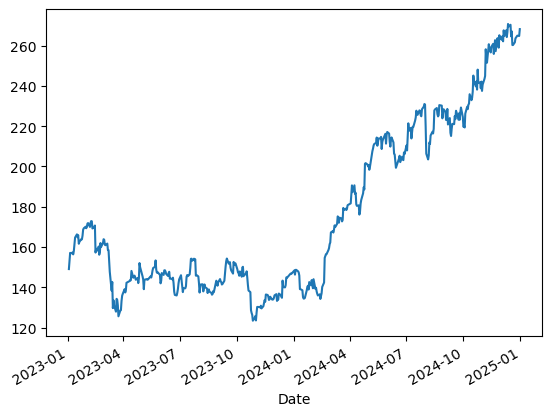

In [9]:
# Plotting the closing prices of each day of Barclays.

BARC.Close.plot()

<Axes: xlabel='Date'>

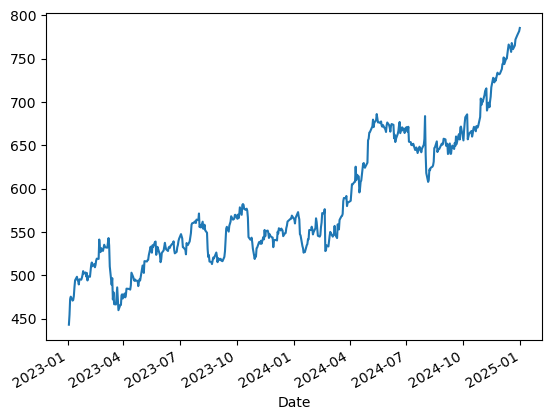

In [11]:
# Plotting the closing prices of each day of HSBC.

HSBA.Close.plot()

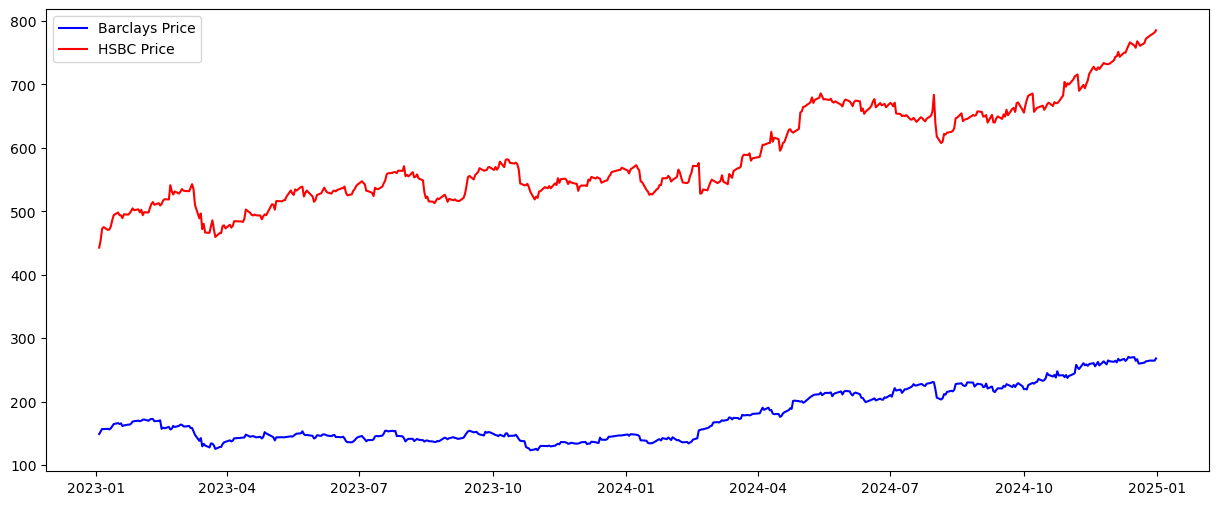

In [13]:
# Plotting the closing prices of each day for the two combined. 


plt.figure(figsize=(15, 6))
plt.plot(BARC['Close'], label='Barclays Price', c='blue', alpha=1)
plt.plot(HSBA['Close'], label='HSBC Price', c='r', alpha=1)
plt.legend()
plt.show()

In [15]:
# Calculating daily returns and adding it to a new column into the database.  
BARC['Return']= returns = BARC.Close.pct_change()
HSBA['Return']= returns = HSBA.Close.pct_change()

In [17]:
BARC

,Close,High,Low,Open,Volume,Return
Date,,,,,,
2023-01-03,149.113983,149.761108,144.994204,145.395247,34940227,NaN
2023-01-04,153.197311,153.388709,149.569726,149.569726,31851649,0.027384
2023-01-05,157.153015,158.356142,151.629602,152.376988,40113321,0.025821
2023-01-06,156.861343,157.408208,156.168629,156.606137,23266356,-0.001856
2023-01-09,157.335281,158.738929,156.660814,156.861335,32930427,0.003021
...,...,...,...,...,...,...
2024-12-23,261.600006,262.049988,259.299988,261.200012,13605305,0.005187
2024-12-24,263.549988,264.181000,262.273010,262.950012,8298189,0.007454
2024-12-27,264.899994,265.899994,263.540009,264.350006,15970484,0.005122


In [19]:
# Dropping the nan values and deleting them from the database. 
#Since the first row of returns will always be NaN (no prior day to compare), the .dropna(inplace=True) method removes these missing values from the datasets. 
#This ensures the data is clean and ready for further analysis.
BARC.dropna(inplace=True)
HSBA.dropna(inplace=True)

In [21]:
HSBA

,Close,High,Low,Open,Volume,Return
Date,,,,,,
2023-01-04,454.222565,455.309011,445.029468,447.202361,21604090,0.025665
2023-01-05,472.441650,475.032463,455.809664,457.983425,36654670,0.040110
2023-01-06,475.199585,476.244255,467.677959,473.026691,31225164,0.005838
2023-01-09,470.686584,473.695214,469.349376,471.773031,23530081,-0.009497
2023-01-10,471.438782,473.361016,467.798351,469.600203,15239244,0.001598
...,...,...,...,...,...,...
2024-12-23,765.099976,770.000000,761.599976,767.400024,13697932,0.005652
2024-12-24,772.000000,772.799988,767.099976,768.900024,3604795,0.009018
2024-12-27,777.099976,782.500000,771.500000,773.799988,13069986,0.006606


In [23]:
# Calculating compounded returns and adding it to a new column into the database.  

BARC['Comp Return'] = (BARC['Return'] + 1).cumprod() - 1
HSBA['Comp Return'] = (HSBA['Return'] + 1).cumprod() - 1

In [25]:
BARC

,Close,High,Low,Open,Volume,Return,Comp Return
Date,,,,,,,
2023-01-04,153.197311,153.388709,149.569726,149.569726,31851649,0.027384,0.027384
2023-01-05,157.153015,158.356142,151.629602,152.376988,40113321,0.025821,0.053912
2023-01-06,156.861343,157.408208,156.168629,156.606137,23266356,-0.001856,0.051956
2023-01-09,157.335281,158.738929,156.660814,156.861335,32930427,0.003021,0.055134
2023-01-10,156.405624,157.371764,154.965524,155.111347,50086285,-0.005909,0.048900
...,...,...,...,...,...,...,...
2024-12-23,261.600006,262.049988,259.299988,261.200012,13605305,0.005187,0.754363
2024-12-24,263.549988,264.181000,262.273010,262.950012,8298189,0.007454,0.767440
2024-12-27,264.899994,265.899994,263.540009,264.350006,15970484,0.005122,0.776493


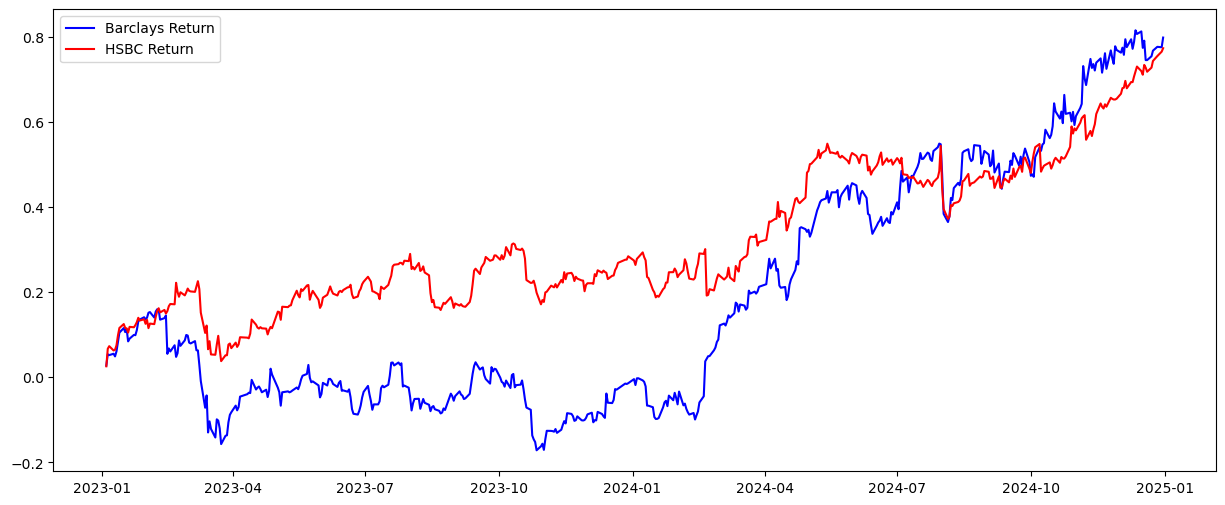

In [27]:
# Plotting the compounded returns of each bank to see how they performed relative to each other in the last 2 years.  
plt.figure(figsize=(15, 6))
plt.plot(BARC['Comp Return'], label='Barclays Return', c='blue', alpha=1)
plt.plot(HSBA['Comp Return'], label='HSBC Return', c='r', alpha=1)
plt.legend()
plt.show()

In [29]:
# Making two yearly dataframes.

BARC_2023 = BARC.iloc[0:250]
BARC_2024 = BARC.iloc[251:-1]

In [31]:
# Caclulating BARC's annual average return for 2023 and 2024.

mu_barc_2023 = BARC_2023.Return.mean()*250
mu_barc_2024 = BARC_2024.Return.mean()*251

In [33]:
print(mu_barc_2023)
print(mu_barc_2024)

0.03240923297601961
0.6154989389118009


In [35]:
# Caclulating BARC's annual average standard deviation for 2023 and 2024.

sigma_barc_2023 = BARC_2023.Return.std()*np.sqrt(250)
sigma_barc_2024 = BARC_2024.Return.std()*np.sqrt(251)

In [37]:
print(sigma_barc_2023)
print(sigma_barc_2024)

0.3044810321411815
0.27893444442304643


In [39]:
# Making two yearly dataframes.

HSBA_2023 = HSBA.iloc[0:250]
HSBA_2024 = HSBA.iloc[251:-1]

In [41]:
# Caclulating HSBC's annual average return for 2023 and 2024.

mu_hsba_2023 = HSBA_2023.Return.mean()*250
mu_hsba_2024 = HSBA_2024.Return.mean()*251

In [43]:
# Caclulating HSBC's annual average standard deviation for 2023 and 2024.

sigma_hsba_2023 = HSBA_2023.Return.std()*np.sqrt(250)
sigma_hsba_2024 = HSBA_2024.Return.std()*np.sqrt(251)

In [45]:
print(mu_hsba_2023)
print(mu_hsba_2024)
print(sigma_hsba_2023)
print(sigma_hsba_2024)

0.27110651091034366
0.3476027822982106
0.2038869057784144
0.21234497564715812


In [47]:
# Calculating correlation between the two bank's returns throughtout the 2-year period.
rho = HSBA['Return'].corr(BARC['Return'])

In [49]:
rho

0.5053942937954149

In [51]:
# Comparing the 2-year results to the ultra-long term 25-year results:

In [53]:
BARC_25_year = yf.download('BARC.L', start ='2000-01-01', end = '2025-01-01')
HSBA_25_year = yf.download('HSBA.L', start ='2000-01-01', end = '2025-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [55]:
BARC_25_year.columns =['Close', 'High', 'Low', 'Open', 'Volume']
HSBA_25_year.columns =['Close', 'High', 'Low', 'Open', 'Volume']

In [57]:
BARC_25_year['Return']= returns = BARC_25_year.Close.pct_change()
HSBA_25_year['Return']= returns = HSBA_25_year.Close.pct_change()

In [59]:
BARC_25_year.dropna(inplace=True)
HSBA_25_year.dropna(inplace=True)

In [61]:
years_barc_25 = BARC_25_year.index.year.unique()
years_hsba_25 = HSBA_25_year.index.year.unique()

In [63]:
yearly_barc_25_means = BARC_25_year.groupby(BARC_25_year.index.year)["Return"].mean()
yearly_hsba_25_means = HSBA_25_year.groupby(HSBA_25_year.index.year)["Return"].mean()

In [65]:
yearly_barc_25_std = BARC_25_year.groupby(BARC_25_year.index.year)["Return"].std()
yearly_hsba_25_std = HSBA_25_year.groupby(HSBA_25_year.index.year)["Return"].std()

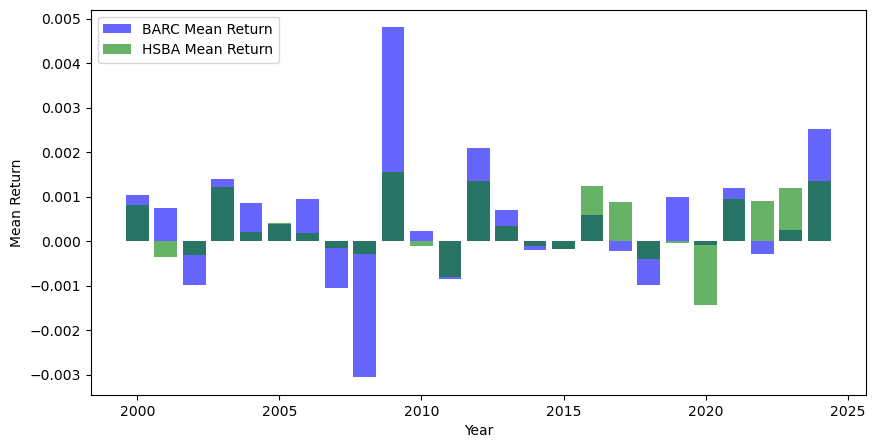

In [67]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot mean returns as bar charts
ax1.bar(yearly_barc_25_means.index, yearly_barc_25_means, alpha=0.6, label="BARC Mean Return", color="blue")
ax1.bar(yearly_hsba_25_means.index, yearly_hsba_25_means, alpha=0.6, label="HSBA Mean Return", color="green")

ax1.set_ylabel("Mean Return")
ax1.set_xlabel("Year")
ax1.legend(loc="upper left")

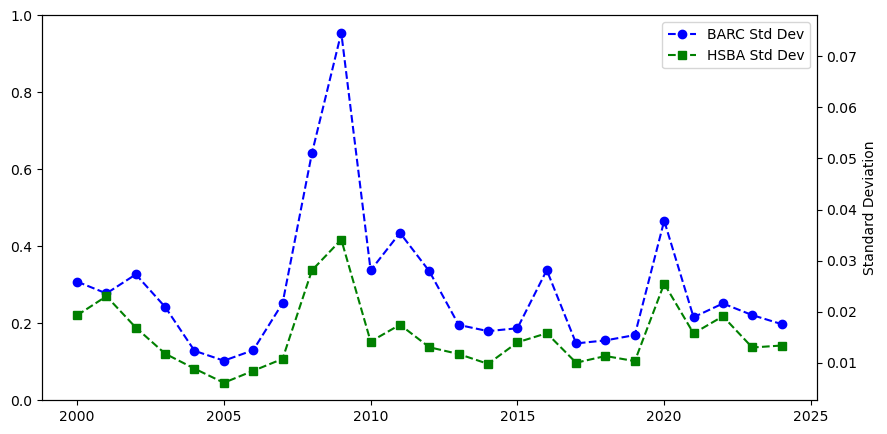

In [69]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot mean returns as bar charts
ax2 = ax1.twinx()
ax2.plot(yearly_barc_25_std.index, yearly_barc_25_std, color="blue", marker="o", linestyle="dashed", label="BARC Std Dev")
ax2.plot(yearly_hsba_25_std.index, yearly_hsba_25_std, color="green", marker="s", linestyle="dashed", label="HSBA Std Dev")

ax2.set_ylabel("Standard Deviation")
ax2.legend(loc="upper right")

In [93]:
combined_df = pd.concat([BARC_25_year[['Return']], HSBA_25_year[['Return']]], axis=1, keys=['BARC_Return', 'HSBA_Return'])
combined_df = combined_df.ffill()

In [95]:
combined_df.columns =['BARC_Return', 'HSBA_Return']

In [97]:
combined_df['BARC_Comp_Return'] = (combined_df['BARC_Return'] + 1).cumprod() - 1
combined_df['HSBA_Comp_Return'] = (combined_df['HSBA_Return'] + 1).cumprod() - 1

In [99]:
combined_df

,BARC_Return,HSBA_Return,BARC_Comp_Return,HSBA_Comp_Return
Date,,,,
2000-01-04,-0.062851,-0.046930,-0.062851,-0.046930
2000-01-05,-0.023952,-0.037082,-0.085298,-0.082272
2000-01-06,-0.037423,-0.032828,-0.119529,-0.112399
2000-01-07,-0.022307,0.007833,-0.139169,-0.105446
2000-01-10,0.013689,0.004534,-0.127385,-0.101391
...,...,...,...,...
2024-12-23,0.005187,0.005652,0.410478,2.432640
2024-12-24,0.007454,0.009018,0.420991,2.463597
2024-12-27,0.005122,0.006606,0.428270,2.486479


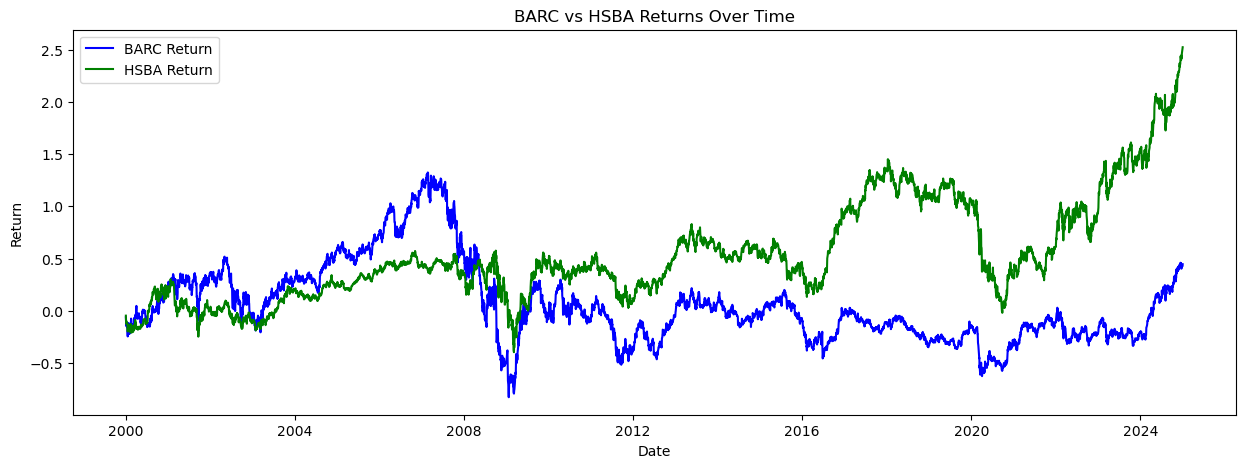

In [101]:
plt.figure(figsize=(15, 5))
plt.plot(combined_df.index, combined_df["BARC_Comp_Return"], label="BARC Return", color="blue")
plt.plot(combined_df.index, combined_df["HSBA_Comp_Return"], label="HSBA Return", color="green")

plt.xlabel("Date")
plt.ylabel("Return")
plt.title("BARC vs HSBA Returns Over Time")
plt.legend()